<a href="https://colab.research.google.com/github/ana-gleice/SAP-4/blob/main/ML_td_NS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning com dados excluidos numero de série **repetidos** negrito

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
dataset = pd.read_excel('dados_etil_tratados_NS.xlsx')


In [3]:
dataset.head()

,DS_MARCA,NO_MODELO,NR_SERIE,NR_ANO,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DESVIO_PONTO_ZERO,DESVIO_CONC_I,DESVIO_CONC_II,DESVIO_CONC_III,VL_ERRO_CONC_III_01,VL_ERRO_CONC_III_02,VL_ERRO_CONC_III_03,VL_ERRO_CONC_III_04,VL_ERRO_CONC_III_05,VL_ERRO_CONC_III_06,VL_ERRO_CONC_III_07,VL_ERRO_CONC_III_08,VL_ERRO_CONC_III_09,VL_ERRO_CONC_III_10,ERRO_MEDIO_1,ERRO_MEDIO_2,ERRO_MEDIO_3,CLASSE
0,ALCOLIZER,LE5,22000002,2019,43809,MRC Líquido,Subsequente,PE,0.0,0.002,0.001,0.836,-2.864,-2.387,-1.193,-0.716,-1.909,-2.864,-2.387,-1.193,-0.716,-1.909,-0.0016,-0.0052,-0.0076,0
1,ALCOLIZER,LE5,22000007,2019,43584,MRC Líquido,Inicial,PE,0.0,0.002,0.002,0.410,2.148,2.148,2.864,2.864,3.103,3.103,2.864,2.864,2.148,2.148,0.0066,0.0048,0.0110,1
2,ALCOLIZER,LE5,22000008,2019,43580,MRC Líquido,Inicial,PE,0.0,0.002,0.001,0.397,4.296,3.819,4.057,2.864,3.819,3.819,4.057,3.580,4.296,3.819,0.0121,0.0133,0.0161,1
3,ALCOLIZER,LE5,22000009,2019,43735,MRC Líquido,Inicial,PE,0.0,0.002,0.002,0.681,-3.103,-3.103,-2.387,-2.387,-3.103,-3.103,-2.864,-2.864,-1.432,-1.432,-0.0028,-0.0078,-0.0108,0
4,ALCOLIZER,LE5,22000014,2019,43741,MRC Líquido,Inicial,PE,0.0,0.002,0.002,0.555,1.432,1.432,0.955,0.716,2.387,1.671,1.671,1.432,0.955,2.387,0.0052,0.0052,0.0063,0


In [4]:
x = dataset.drop(columns=['DS_MARCA', 'NO_MODELO', 'NR_SERIE', 'NR_ANO', 'DT_ENSAIO', 'DS_METODO', 'TP_ENSAIO', 'UF_ENSAIO','UF_ENSAIO', 'CLASSE']).values
y = dataset.iloc[:,-1].values

In [5]:
print(y)

[0 1 1 ... 1 1 1]


In [6]:
print(x)

[[ 0.      0.002   0.001  ... -0.0016 -0.0052 -0.0076]
 [ 0.      0.002   0.002  ...  0.0066  0.0048  0.011 ]
 [ 0.      0.002   0.001  ...  0.0121  0.0133  0.0161]
 ...
 [ 0.      0.001   0.001  ... -0.004  -0.0052 -0.0253]
 [ 0.      0.001   0.001  ... -0.0056  0.0038 -0.0143]
 [ 0.      0.      0.001  ... -0.0063 -0.0066 -0.0233]]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [8]:
print(x_train)

[[ 0.      0.002   0.003  ... -0.0098 -0.0207 -0.0254]
 [ 0.      0.001   0.001  ... -0.018  -0.0135 -0.0116]
 [ 0.      0.001   0.002  ... -0.0314 -0.0481 -0.0687]
 ...
 [ 0.      0.001   0.001  ...  0.0031  0.0063  0.0099]
 [ 0.      0.002   0.003  ... -0.0182 -0.0574 -0.094 ]
 [ 0.      0.001   0.001  ...  0.0005 -0.0074 -0.0124]]


In [9]:
x_train.shape

(3242, 17)

In [10]:
y_test.shape

(811,)

1    3351
0     702
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


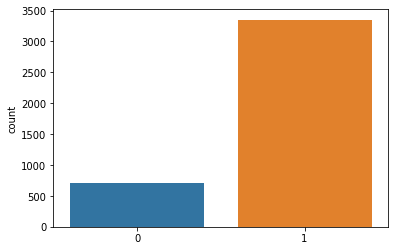

In [11]:
print(pd.Series(y).value_counts())
sns.countplot(y);

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.06288189 -0.2138145  -0.66159833 ... -0.09972117  1.34472027
  -0.64926467]
 [-0.06288189 -0.2138145  -0.66159833 ... -0.09972117 -1.21212803
  -0.64926467]
 [-0.06288189 -0.2138145  -0.66159833 ... -0.09972117 -0.35984526
  -0.64926467]
 ...
 [-0.06288189 -0.2138145  -0.66159833 ... -0.09972117  0.4924375
   0.72964206]
 [-0.06288189 -0.2138145  -0.66159833 ... -0.09972117 -0.35984526
   1.41909543]
 [-0.06288189 -0.2138145  -0.66159833 ... -0.09972117 -0.35984526
   0.0401887 ]]


In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_res, y_res = rus.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
y_res.shape

(1106,)

1    553
0    553
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


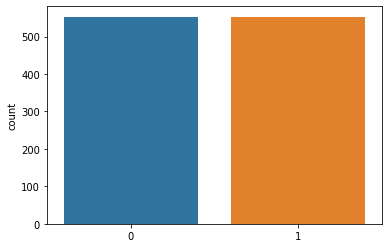

In [14]:
print(pd.Series(y_res).value_counts())
sns.countplot(y_res);

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_res = LogisticRegression()
model_res.fit(x_res, y_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(x_test)
y_proba_res = model_res.predict_proba(x_test)
 
 
# imprimir relatório de classificação
print("Relatório de Classificação LinearRegression:\n", classification_report(y_test, y_pred_res, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))
 
print(accuracy_score(y_test, y_pred_res))


Relatório de Classificação LinearRegression:
               precision    recall  f1-score   support

           0     0.2482    0.4698    0.3248       149
           1     0.8507    0.6798    0.7557       662

    accuracy                         0.6412       811
   macro avg     0.5494    0.5748    0.5402       811
weighted avg     0.7400    0.6412    0.6765       811

Acurácia: 0.6412

0.6411837237977805


In [16]:
from sklearn.svm import SVC
model_svc = SVC(kernel = 'linear', random_state = 0)
model_svc.fit(x_res, y_res)
y_pred_svc = model_svc.predict(x_test)

# imprimir relatório de classificação
print("Relatório de Classificação SVC:\n", classification_report(y_test, y_pred_svc, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_svc)))
 
print(accuracy_score(y_test, y_pred_svc))


Relatório de Classificação SVC:
               precision    recall  f1-score   support

           0     0.2531    0.4161    0.3147       149
           1     0.8463    0.7236    0.7801       662

    accuracy                         0.6671       811
   macro avg     0.5497    0.5698    0.5474       811
weighted avg     0.7373    0.6671    0.6946       811

Acurácia: 0.6671

0.6670776818742293


In [17]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dtc.fit(x_res, y_res)
y_pred_dtc = model_dtc.predict(x_test)

# imprimir relatório de classificação
print("Relatório de Classificação DecisionTreeClassifier:\n", classification_report(y_test, y_pred_dtc, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_dtc)))
 
print(accuracy_score(y_test, y_pred_dtc))


Relatório de Classificação DecisionTreeClassifier:
               precision    recall  f1-score   support

           0     0.2436    0.5705    0.3414       149
           1     0.8615    0.6012    0.7082       662

    accuracy                         0.5956       811
   macro avg     0.5525    0.5858    0.5248       811
weighted avg     0.7479    0.5956    0.6408       811

Acurácia: 0.5956

0.5955610357583231


In [18]:
cm_reg = confusion_matrix(y_test, y_pred_res)
print('Matriz de Confusão LinearRegression: \n {}'.format(cm_reg))
cm_svc = confusion_matrix(y_test, y_pred_svc)
print('Matriz de Confusão SVC: \n {}'.format(cm_svc))
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print('Matriz de Confusão DTC: \n {}'.format(cm_dtc))


Matriz de Confusão LinearRegression: 
 [[ 70  79]
 [212 450]]
Matriz de Confusão SVC: 
 [[ 62  87]
 [183 479]]
Matriz de Confusão DTC: 
 [[ 85  64]
 [264 398]]
